<a href="https://colab.research.google.com/github/nhon14/CS7324-5324/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Team
Nathan Hon

# Business Understanding
For this lab assignment I have selected a a text dataset that contains Tweets regarding the 2022 FIFA World Cup. My goal is to use deep learning architecture, recurrent neural network architectures in this case, to assist with training and predicting the different sentiments of tweets. In this lab, I aim to visualize and compare the effectiveness of two types of recurrent neural networks (LSTM and GRU). The dataset used is "FIFA World Cup 2022 Tweets" by Tirendaz Academy, it is found on Kaggle at this link: https://www.kaggle.com/datasets/tirendazacademy/fifa-world-cup-2022-tweets

This report aims to demonstrate the effectiveness of using RNN architecture which is effective in training and predicting text-based data. Predictions for this dataset can help businesses gauge the sentiment the public has towards various aspects of the World Cup, it could be used by FIFA themselves or other corporations involved with the World Cup to know their customers better and improve their marketing and advertising strategies.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
# import os

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from matplotlib import pyplot as plt
%matplotlib inline


## Preprocess and Tokenize

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RNN/fifa_world_cup_2022_tweets.csv')

In [ ]:
df.head()

,DateCreated,NumberofLikes,SourceofTweet,Tweet,Sentiment
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [ ]:
df_grouped_sentiment = df.groupby(by = 'Sentiment')

for val, sentiment in df_grouped_sentiment:
  print(val, 'had', len(sentiment), ' tweets.')

negative had 5784  tweets.
neutral had 8251  tweets.
positive had 8489  tweets.


In [ ]:
df_clean = df.drop(columns=['DateCreated','NumberofLikes','SourceofTweet','Sentiment'])

In [ ]:
arr = df_clean.to_numpy()

In [ ]:
print(arr[0])

['What are we drinking today @TucanTribe \n@MadBears_ \n@lkinc_algo \n@al_goanna \n\n#WorldCup2022 https://t.co/Oga3TzvG5h']


In [ ]:
arr = arr.tolist()

In [ ]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

Here I incorporated a suggested preprocessing method provided by the author of the dataset. The purpose of this preprocessing method is to filter out website links as well as Twitter usernames to allow the tokenizer below to skip these words and focus on words that do have sentimental impact.

In [ ]:
cleaned_tweets = []

for i in arr:
  # print(i[0])
  cleaned_tweets.append(preprocess(i[0]))

In [ ]:
print(cleaned_tweets[1])

Amazing @user  #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986.  Can’t wait to see these boys in action!

This is Canada: FIFA World Cup Opening Video http


In [ ]:
df_final = df.drop(columns=['Tweet','DateCreated','NumberofLikes','SourceofTweet'])
print(df_final)

      Sentiment
0       neutral
1      positive
2      positive
3      positive
4      negative
...         ...
22519  positive
22520   neutral
22521  positive
22522  positive
22523   neutral

[22524 rows x 1 columns]


In [ ]:
df_final['Tweets'] = cleaned_tweets

Here I drop all unneeded columns and keep just the Tweets and Sentiment columns for my analysis.

In [ ]:
print(df_final)

      Sentiment                                             Tweets
0       neutral  What are we drinking today @user \n@MadBears_ ...
1      positive  Amazing @user  #WorldCup2022 launch video. Sho...
2      positive    Worth reading while watching #WorldCup2022 http
3      positive  Golden Maknae shinning bright\n\nhttps://t.co/...
4      negative  If the BBC cares so much about human rights, h...
...         ...                                                ...
22519  positive            Here We go World cup 2022 #WorldCup2022
22520   neutral  Anderlecht confirms former Viborg FF's Jesper ...
22521  positive  Great thread to read before the start of #Worl...
22522  positive  Raphinha wants Brazil to be united at the #Wor...
22523   neutral  How to buy $SOT on PinkSale?🤔\n\nHave you been...

[22524 rows x 2 columns]


Due to time constraints as well as issues with adapting my dataset to the example notebook on GitHub I have omitted 'neutral' tweets and kept 'postitive' and 'negative' tweets. Although this affects the quality of predictions it can still demonstrate the benefits of different architectures within recurrent neural networks. Instead of using the full dataset, we will be assessing the remaining 14,273 tweets. This is still an ample amount to train and test a simple RNN, LSTM as well as GRU. This also helps to cut down on processing time. For future analysis, incorporating 'neutral' tweets would significantly improve prediction quality which would be much more useful in benefitting both the entertainment and sport industry as well as education in both financial and quality research.

In [ ]:
df_final = df_final.drop(df_final[df_final.Sentiment=='neutral'].index)
print(df_final)

      Sentiment                                             Tweets
1      positive  Amazing @user  #WorldCup2022 launch video. Sho...
2      positive    Worth reading while watching #WorldCup2022 http
3      positive  Golden Maknae shinning bright\n\nhttps://t.co/...
4      negative  If the BBC cares so much about human rights, h...
5      negative  And like, will the mexican fans be able to scr...
...         ...                                                ...
22517  positive  The World Cup starts TODAY!\n\n#Qatar2022 #Foo...
22518  negative  World Cup starts today, and I could not give a...
22519  positive            Here We go World cup 2022 #WorldCup2022
22521  positive  Great thread to read before the start of #Worl...
22522  positive  Raphinha wants Brazil to be united at the #Wor...

[14273 rows x 2 columns]


### Tokenization Methods
Tokenization can be performed on either a word, character or subword. With our dataset, we will implement a word tokenizer. For the purposes of sentiment prediction, word tokenization should be sufficient in providing 


Reference: https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/

In [ ]:
%%time
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

top_words = 1000 # uses the top 1000 most frequent words
max_tweet_length = 300 # maximum and minimum number of words. Changed from 1000 to 300

X = df_final['Tweets'].to_numpy()

# arr = df_final.to_numpy()
# (X_train, y_train), (X_test, y_test) = arr(num_words=top_words)

#tokenize the text
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X)

# y = df_final['Sentiment'].to_numpy()

y = []

for label in df_final['Sentiment'].to_numpy():
      # if(label == "neutral"):
        # y.append(0)
      if(label == "positive"):
        y.append(0)
      elif(label == "negative"):
        y.append(1)


# store image paths and labels
# all_paths, all_labels = shuffle(all_paths, all_labels)

# y_ohe = keras.utils.to_categorical(y)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences, maxlen=max_tweet_length)
# max_tweet_length = 300
# X_train = sequence.pad_sequences(X_train, maxlen=max_tweet_length)
# X_test = sequence.pad_sequences(X_test, maxlen=max_tweet_length)

CPU times: user 983 ms, sys: 13 ms, total: 996 ms
Wall time: 1.02 s


In [ ]:
y = np.array(y)
print(y)

[0 0 0 ... 0 0 0]


### Choice of Metric: Classification Accuracy
For this dataset, 70-80% would be sufficient as the purpose of predictions for this dataset would be in relation with either business, education or informational reasons. Companies such as FIFA or other companies such as Budweiser or Adidas could use prediction results to improve marketing strategies. The risk of wrongly predicting data is relatively low compared to medical datasets that could put people in a life or death situation depending on the prediction results. In this case, as stated above, the use of the results will most likely be sufficient for the Sport entertainment industry or as a learning tool in academia. However, misclassifying tweet sentiments would result in false and inaccurate data that could result in a negative financial impact to companies, so ensuring that accuracy is at least above 70% is crucial.

In [ ]:
# Split it into train / test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                            stratify=y,
                                                            shuffle = True, 
                                                            random_state=42)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)
NUM_CLASSES = 1

Shape of data tensor: (14273, 300)
Shape of label tensor: (14273,)


### Train, Test, Split


*   The dataset used contains tweets regarding the 2022 FIFA World Cup on one particular day. I first loaded in the text and then after preprocessing, stored the tweets in the train and test variables of X and the sentiments in the train and test variables of y.
*   Originally, the dataset contained 22,534 tweets. I cut this down to a total of 14,273 tweets due to the aforementioned reason for removing neutral tweets. The remaining subset contains 8489 tweets classified as positive and 5784 classified as negative. Although the amount of negative tweets is lower, it is sufficient for this case in demonstrating and comparing different RNN architectures. Increasing the dataset could contribute to higher accuracy and lower loss.
*   As seen in the code block above, I split the training and test 80%/20% and it was sufficient for the results below. I also utilized shuffle in order to randomize data being trained so that it wouldn't be iterating through the exact same data with each epoch. I also used stratify in order to ensure that my data in my training and testing variables represented each rice type equally, this is particularly important since positive tweets outnumber negative tweets by over 3000 as stated before.


In [ ]:
print(type(X_train), X_train.shape)
print(type(X_train[0]), X_train[0].shape)
print('Vocabulary size:', np.max(X_train))
print(y_train.shape, np.min(y_train), np.max(y_train))

<class 'numpy.ndarray'> (11418, 300)
<class 'numpy.ndarray'> (300,)
Vocabulary size: 999
(11418,) 0 1


In [ ]:
# show example without the FOR loop
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, SimpleRNN
from tensorflow.keras.layers import Embedding

EMBED_SIZE = 50
RNN_STATESIZE = 100
rnns = []
# top_words = 1000
# max_tweet_length = 300
input_holder = Input(shape=(X_train.shape[1], ))
# print(X_train.shape[1])
shared_embed = Embedding(top_words, # input dimension (max int of OHE)
                EMBED_SIZE, # output dimension size
                input_length=max_tweet_length)(input_holder) # number of words in each sequence


x = SimpleRNN(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
simple_rnn_model = Model(inputs=input_holder,outputs=x)

In [ ]:
print(X.shape)
print(X)

(14273, 300)
[[  0   0   0 ...  38 554   3]
 [  0   0   0 ... 108   1   3]
 [  0   0   0 ...   1 595 209]
 ...
 [  0   0   0 ...  14  59   1]
 [  0   0   0 ...   7   1   3]
 [  0   0   0 ...   2   1   3]]


In [ ]:
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# create LSTM
x = LSTM(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
lstm_model = Model(inputs=input_holder,outputs=x)

# create GRU
x = GRU(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
gru_model = Model(inputs=input_holder,outputs=x)

# lr_schedule = ExponentialDecay(
#     initial_learning_rate=0.1,
#     decay_steps=10000,
#     decay_rate=0.95) 

opt = Adam(lr=0.0001, epsilon=0.0001, clipnorm=1.0)

simple_rnn_model.compile(loss='binary_crossentropy', 
              optimizer= opt, 
              metrics=['accuracy'])

lstm_model.compile(loss='binary_crossentropy', 
              optimizer= opt, 
              metrics=['accuracy'])

gru_model.compile(loss='binary_crossentropy', 
              optimizer= opt, 
              metrics=['accuracy'])

print(simple_rnn_model.summary())
print(lstm_model.summary())
print(gru_model.summary())

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 300, 50)           50000     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 100)               15100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 65,201
Trainable params: 65,201
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


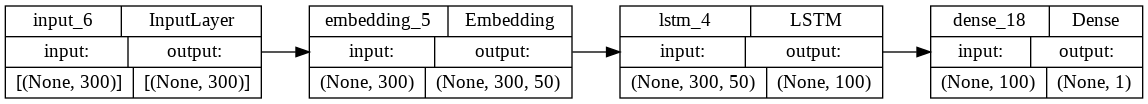

In [ ]:
from tensorflow.keras.utils import plot_model

# you will need to install pydot properly on your machine to get this running
plot_model(
    lstm_model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [ ]:
print(y.shape)
print(y_train)
print(y_test)
type(y_test)

(14273,)
[0 0 0 ... 0 0 0]
[0 1 0 ... 0 1 0]


numpy.ndarray

In [ ]:
history_simple_rnn1 = simple_rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
history_lstm_rnn1 = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
history_gru_rnn1 = gru_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
179/179 [==============================] - 41s 216ms/step - loss: 0.7052 - accuracy: 0.5284 - val_loss: 0.6638 - val_accuracy: 0.5951
Epoch 2/10
179/179 [==============================] - 45s 252ms/step - loss: 0.6807 - accuracy: 0.5730 - val_loss: 0.6496 - val_accuracy: 0.5954
Epoch 3/10
179/179 [==============================] - 43s 241ms/step - loss: 0.6695 - accuracy: 0.5896 - val_loss: 0.6316 - val_accuracy: 0.5996
Epoch 4/10
179/179 [==============================] - 43s 239ms/step - loss: 0.6542 - accuracy: 0.6122 - val_loss: 0.6210 - val_accuracy: 0.6007
Epoch 5/10
179/179 [==============================] - 40s 222ms/step - loss: 0.6398 - accuracy: 0.6236 - val_loss: 0.5988 - val_accuracy: 0.6452
Epoch 6/10
179/179 [==============================] - 38s 210ms/step - loss: 0.6229 - accuracy: 0.6497 - val_loss: 0.5848 - val_accuracy: 0.6536
Epoch 7/10
179/179 [==============================] - 39s 218ms/step - loss: 0.6020 - accuracy: 0.6685 - val_loss: 0.5361 - val_ac

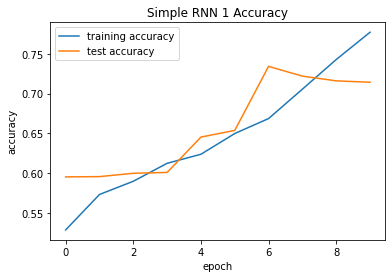

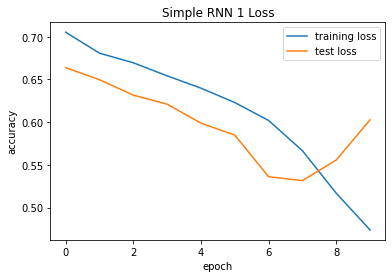

In [ ]:
history_simple_rnn1.history
plt.plot(history_simple_rnn1.history["accuracy"])
plt.plot(history_simple_rnn1.history["val_accuracy"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('Simple RNN Accuracy')
ax = plt.gca()
ax.legend(['training accuracy', 'test accuracy'])
plt.show()
print()
#-----------------------------------------
plt.plot(history_simple_rnn1.history["loss"])
plt.plot(history_simple_rnn1.history["val_loss"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('Simple RNN Loss')
ax = plt.gca()
ax.legend(['training loss', 'test loss'])
plt.show()

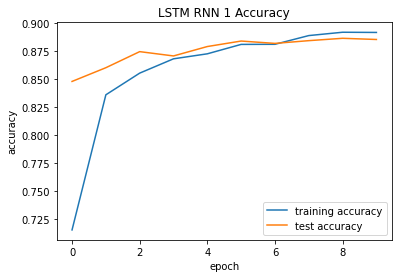

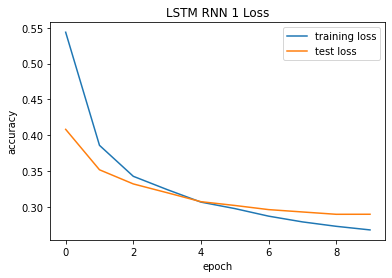

In [ ]:
history_lstm_rnn1.history
plt.plot(history_lstm_rnn1.history["accuracy"])
plt.plot(history_lstm_rnn1.history["val_accuracy"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('LSTM RNN Accuracy')
ax = plt.gca()
ax.legend(['training accuracy', 'test accuracy'])
plt.show()
print()
#-----------------------------------------
plt.plot(history_lstm_rnn1.history["loss"])
plt.plot(history_lstm_rnn1.history["val_loss"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('LSTM RNN Loss')
ax = plt.gca()
ax.legend(['training loss', 'test loss'])
plt.show()

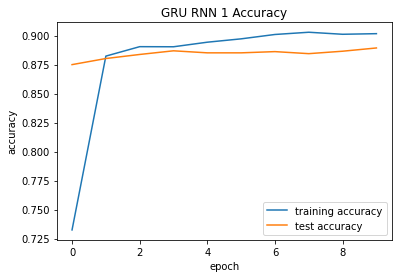

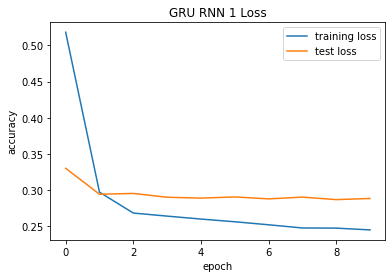

In [ ]:
history_gru_rnn1.history
plt.plot(history_gru_rnn1.history["accuracy"])
plt.plot(history_gru_rnn1.history["val_accuracy"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('GRU RNN Accuracy')
ax = plt.gca()
ax.legend(['training accuracy', 'test accuracy'])
plt.show()
print()
#-----------------------------------------
plt.plot(history_gru_rnn1.history["loss"])
plt.plot(history_gru_rnn1.history["val_loss"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('GRU RNN Loss')
ax = plt.gca()
ax.legend(['training loss', 'test loss'])
plt.show()

In [ ]:
history_simple_rnn1 = simple_rnn_model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))
history_lstm_rnn1 = lstm_model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))
history_gru_rnn1 = gru_model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/25
179/179 [==============================] - 41s 230ms/step - loss: 0.5191 - accuracy: 0.7841 - val_loss: 0.5466 - val_accuracy: 0.7587
Epoch 2/25
179/179 [==============================] - 39s 216ms/step - loss: 0.5090 - accuracy: 0.8009 - val_loss: 0.5314 - val_accuracy: 0.7867
Epoch 3/25
179/179 [==============================] - 39s 218ms/step - loss: 0.4999 - accuracy: 0.8177 - val_loss: 0.4910 - val_accuracy: 0.8329
Epoch 4/25
179/179 [==============================] - 39s 216ms/step - loss: 0.4948 - accuracy: 0.8280 - val_loss: 0.5256 - val_accuracy: 0.8063
Epoch 5/25
179/179 [==============================] - 40s 224ms/step - loss: 0.4890 - accuracy: 0.8339 - val_loss: 0.5513 - val_accuracy: 0.7821
Epoch 6/25
179/179 [==============================] - 38s 215ms/step - loss: 0.4828 - accuracy: 0.8418 - val_loss: 0.5078 - val_accuracy: 0.8207
Epoch 7/25
179/179 [==============================] - 39s 215ms/step - loss: 0.4759 - accuracy: 0.8508 - val_loss: 0.5023 - val_ac

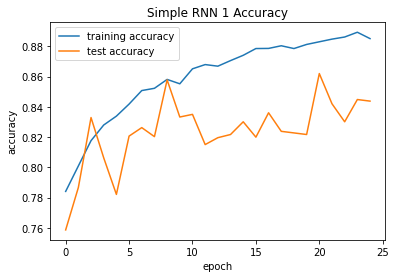

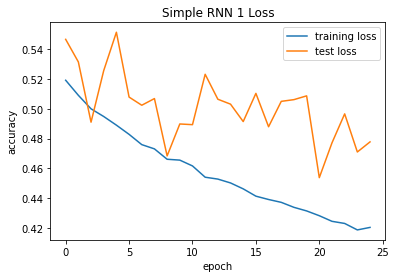

In [ ]:
history_simple_rnn1.history
plt.plot(history_simple_rnn1.history["accuracy"])
plt.plot(history_simple_rnn1.history["val_accuracy"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('Simple RNN 1 Accuracy')
ax = plt.gca()
ax.legend(['training accuracy', 'test accuracy'])
plt.show()
print()
#-----------------------------------------
plt.plot(history_simple_rnn1.history["loss"])
plt.plot(history_simple_rnn1.history["val_loss"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('Simple RNN 1 Loss')
ax = plt.gca()
ax.legend(['training loss', 'test loss'])
plt.show()

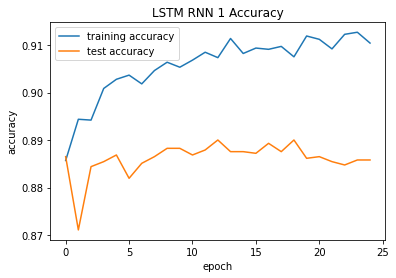

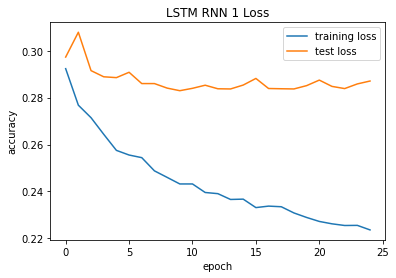

In [ ]:
history_lstm_rnn1.history
plt.plot(history_lstm_rnn1.history["accuracy"])
plt.plot(history_lstm_rnn1.history["val_accuracy"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('LSTM RNN 1 Accuracy')
ax = plt.gca()
ax.legend(['training accuracy', 'test accuracy'])
plt.show()
print()
#-----------------------------------------
plt.plot(history_lstm_rnn1.history["loss"])
plt.plot(history_lstm_rnn1.history["val_loss"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('LSTM RNN 1 Loss')
ax = plt.gca()
ax.legend(['training loss', 'test loss'])
plt.show()

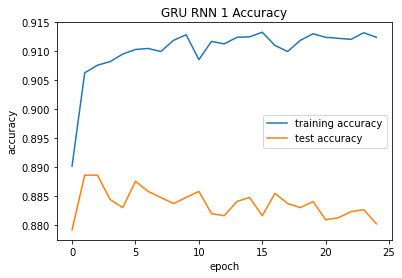

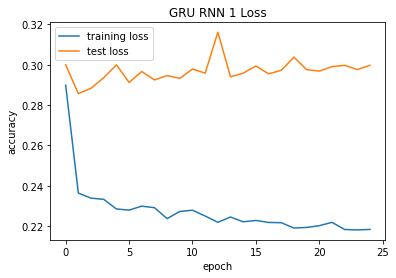

In [ ]:
history_gru_rnn1.history
plt.plot(history_gru_rnn1.history["accuracy"])
plt.plot(history_gru_rnn1.history["val_accuracy"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('GRU RNN 1 Accuracy')
ax = plt.gca()
ax.legend(['training accuracy', 'test accuracy'])
plt.show()
print()
#-----------------------------------------
plt.plot(history_gru_rnn1.history["loss"])
plt.plot(history_gru_rnn1.history["val_loss"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('GRU RNN 1 Loss')
ax = plt.gca()
ax.legend(['training loss', 'test loss'])
plt.show()

### Disclaimer
In the models ran above, I actually first ran the iterations containing Simple RNN, LSTM, and GRU on 25 epochs after testing initially with 6. Due to time constraints, I reran those models with a shorter duration of 10 epochs further above and noticed that the results still visualized the benefits of the different model types. I noticed that in the longer iteration that LSTM and GRU particularly reached their peak accuracies rather quickly and the prolonged amount of epochs did not provide significant improvement to accuracy and loss.

## Understanding the Data
After running the dataset through the Simple RNN, LSTM, and GRU, we can now compare the results. 

### Simple RNN vs LSTM
The LSTM network is an extension of RNN, it enables RNNs to remember inputs over a long period of time through it's capability of containing information in a memory. The memory can be seen as a gated cell which can allocate weight and thus importance to data that actually affects the results, in our case, weights that affect the sentiment of the tweet. On the otherhand, RNN suffer from vanishing gradient as they only have short term memory and nodes within a layer only have the same weight. We can see that the Simple RNN reached a peak accuracy of 84% with a loss rate at 43%. Meanwhile, the LSTM model reached a peak accuracy of 89% with a loss rate of 20~%. If we also look at the results of the 25 epoch test, it can be seen that the Simple RNN model started off at a much lower accuracy rate of 44% whereas the LSTM started with a much higher rate of 88%. Not only is the peak accuracy of LSTM higher and the loss rate significantly lower, but the fact that the LSTM starts at a much higher percentage lets us know that it is far more efficient in analyzing data in a shorter amount of time while producing more accurate results. 

### LSTM vs GRU
Like LSTM, GRU is also designed to address the issue of vanishing gradient in Simple RNN. However GRU has two gates, the reset gate and the update get, whereas LSTM has an addition of the forget and output gate. In our assessment, LSTM produced a peak of 89% in accuracy with 28% loss whereas GRU produced a peak of 88% accuracy with 29% loss. Although it is only a slight difference, LSTM comes out on top between the two.

Reference: https://builtin.com/data-science/recurrent-neural-networks-and-lstm

https://medium.com/analytics-vidhya/rnn-vs-gru-vs-lstm-863b0b7b1573

### Second Recurrent Chain

In [ ]:
x = LSTM(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
lstm_model = Model(inputs=input_holder,outputs=x)

In [ ]:
opt = Adam(lr=0.0001, epsilon=0.0001, clipnorm=1.0)

lstm_model.compile(loss='binary_crossentropy', 
              optimizer= opt, 
              metrics=['accuracy'])

print(lstm_model.summary())

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 300, 50)           50000     
                                                                 
 lstm_5 (LSTM)               (None, 100)               60400     
                                                                 
 dense_20 (Dense)            (None, 1)                 101       
                                                                 
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 110,503
Trainable params: 110,503
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_lstm_rnn2 = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
179/179 [==============================] - 178s 995ms/step - loss: 0.6725 - accuracy: 0.5948 - val_loss: 0.6695 - val_accuracy: 0.5947
Epoch 2/10
179/179 [==============================] - 150s 839ms/step - loss: 0.6572 - accuracy: 0.5948 - val_loss: 0.6305 - val_accuracy: 0.5947
Epoch 3/10
179/179 [==============================] - 165s 922ms/step - loss: 0.6023 - accuracy: 0.5958 - val_loss: 0.5790 - val_accuracy: 0.6067
Epoch 4/10
179/179 [==============================] - 150s 836ms/step - loss: 0.5668 - accuracy: 0.6495 - val_loss: 0.5598 - val_accuracy: 0.6967
Epoch 5/10
179/179 [==============================] - 150s 836ms/step - loss: 0.5523 - accuracy: 0.7273 - val_loss: 0.5489 - val_accuracy: 0.7513
Epoch 6/10
179/179 [==============================] - 146s 816ms/step - loss: 0.5426 - accuracy: 0.7802 - val_loss: 0.5443 - val_accuracy: 0.7706
Epoch 7/10
179/179 [==============================] - 148s 829ms/step - loss: 0.5359 - accuracy: 0.8073 - val_loss: 0.5361 -

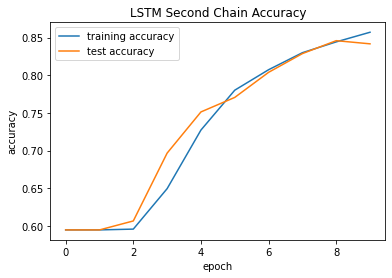

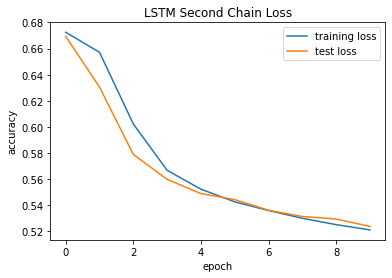

In [ ]:
history_lstm_rnn2.history
plt.plot(history_lstm_rnn2.history["accuracy"])
plt.plot(history_lstm_rnn2.history["val_accuracy"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('LSTM Second Chain Accuracy')
ax = plt.gca()
ax.legend(['training accuracy', 'test accuracy'])
plt.show()
print()
#-----------------------------------------
plt.plot(history_lstm_rnn2.history["loss"])
plt.plot(history_lstm_rnn2.history["val_loss"])
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.title('LSTM Second Chain Loss')
ax = plt.gca()
ax.legend(['training loss', 'test loss'])
plt.show()

## Best Method
In this analysis, although LSTM and GRU produced very similar results, LSTM was slightly more accurate with a slightly lower loss rate. Using LSTM, we implemented a second chain and although the accuracies showed significant improvement within 10 epochs, its accuracy was lower and the loss was also higher. In my case, LSTM proved to be the best method, this makes sense as it has the most gates that help attribute weight to data which is helpful in predicting a positive or negative sentiment.

## UMAP
In this section I will use UMAP to embed the text from our tweets. This will help us to visualize the proximity of tweets with the same sentiments. We will use a bag of words model and use UMAP on the count vectors as well as the TF-IDF vectors.

Reference: https://github.com/lmcinnes/umap/blob/master/notebooks/Document%20embedding%20using%20UMAP.ipynb

In [ ]:
import umap.umap_ as umap
import umap.plot
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [ ]:
reducer = umap.UMAP()

In [ ]:
scaled_df_final = StandardScaler().fit_transform(X)

In [ ]:
embedding = reducer.fit_transform(scaled_df_final)
embedding.shape

(14273, 2)

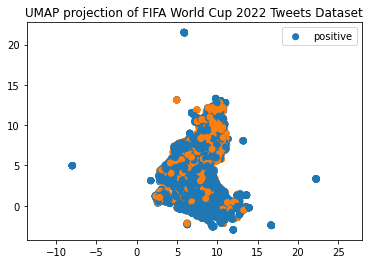

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_final.Sentiment.map({"positive":0, "negative":1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of FIFA World Cup 2022 Tweets Dataset', fontsize=12);
ax = plt.gca()
ax.legend(['positive','negative'])

### UMAP Analysis
After scaling and embedding the data, the above plot was generated with blue dots representing positive classified tweets and orange dots representing negative classified tweets. From what I understand from the dataset, since certain words are attributed with being negative while others positive, it would make sense that there are tweets of varying lengths and that each one has a different mixture of more negative than positive or vice versa. This graphic could be improved if we were to add in neutral data to add another layer to it, however, it is still helpful to visually depict the sentiment analysis.

In [ ]:
%%shell
jupyter nbconvert --to html /content/Lab7.ipynb

[NbConvertApp] Converting notebook /content/Lab7.ipynb to html
[NbConvertApp] Writing 752035 bytes to /content/Lab7.html
